# Исследование пользователей стримингового сервиса

**Задача**: найти точки роста для продукта

**Решение**: составить портрет пользователя

**Вопросы, на которые нужно ответить:**  
 
1. Сколько новых пользователей подписывается на сервис каждый месяц? 
2. Какой самый популярный тип подписки у пользователей?
3. Сколько пользователей в различных странах?
4. Какое распределение по возрасту среди пользователей сервиса?
5. В каких странах находятся пользователи, которые дольше всего подписаны на сервис?
6. Как связаны типы подписок и страна пользователя?
7. Какая платформа для использования сервиса самая популярная?
8. Как связана выручка и тип подписки, страна и платформа?
9. Сколько пользователей от нас ушли за все время?


## Выводы

В процессе анализа поведения пользователей стримингового сервиса были выявлены следующие особенности:
1. Изначально (в ноябре 2022 года) на сервис подписывалось около 25 пользователей в месяц. Однако с декабря 2022-го года началось падение новых подписчиков сервиса, и сейчас стабильно в районе 1-2 пользователей в день;
2. Самый популярный тип подписки среди пользователей - Базовая (Basic). При этом премиальный (Premium) и стандартный (Standard) сегменты находятся в одном диапазоне значений. Премиальный (Premium) имеет меньше всех остальных пользователей;
3. В США. Канаде и Испании наибольшее количество пользователей сервиса. При этом в остальных странах количество пользователей одинаковое. Стоит обратить на них внимание как на потенциальные рынки для роста;
4. Преобладающая группа пользователей - от 25 до 45 лет. Старшее поколение представлено горадо меньше;
5. Дольше всего подписаны на сервис пользователи из Великобритании и Франции. Вторыми по данному показателю являются Австралия и Бразилия;
6. Базовая подписка популярна у пользователей из США, Канады, Германии, Бразилии и Италии. Премиальная подписка пользуется популярностью у зрителей из Испании. Стандартная подписка - выбор жителей Мексики и Великобритании. Меньше всего на базовую подписку соглашались зрители из Великобритании и Мексики. Пользователи из Германии, Мексики и Италии не жалуют премиальный тариф. У стандартного тарифа мало пользователей в Италии и Бразилии;
7. В США и Германии самой популярной плтформой ялвяется ПК. На смартфоне сервисом чаще пользуются в Бразилии, Австралии и Великобритании. Канада - единственная страна, где популярны планшеты. Наиболее популярными платформами в мире являются ПК и планшет. Наименее - Смарт ТВ;
8. Премиальная подписка в среднем приносит больше месячной выручки, нежели базовая и стандартная. Мексика - единственная страна, где общая месячная выручка меньше, чем в остальных странах. Это объясняется отсутствием пермиальной подписки у пользователей, и их выбором в пользу стандартной. Большую месячную выручку приносят такие страны, как Великобритания, США, Франция, Бразилия, Испания, Италия. Меньшую общую выручку дают Канада, Австралия и Германия. Подписка, оформляемая пользователями на смартфонах, приносит меньшую выручку каждый месяц, чем все остальные платформы;
9. Сервис покидает толь 0.16% пользователей.

In [3]:
# для того, чтобы графики отображались сразу в тетрадке, а не в отдельном окне
%matplotlib inline 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = "arial"

In [3]:
sns.__version__

'0.12.2'

## Получение данных

In [5]:
data = pd.read_csv('Userbase.csv')

In [53]:
data.head(50)

user_id  sub_type  monthly_revenue first_sub_date last_sub_date  \
0         1     Basic               10     2022-01-15    2023-06-10   
1         2   Premium               15     2021-09-05    2023-06-22   
2         3  Standard               12     2023-02-28    2023-06-27   
3         4  Standard               12     2022-07-10    2023-06-26   
4         5     Basic               10     2023-05-01    2023-06-28   
5         6   Premium               15     2022-03-18    2023-06-27   
6         7  Standard               12     2021-12-09    2023-06-25   
7         8     Basic               10     2023-04-02    2023-06-24   
8         9  Standard               12     2022-10-20    2023-06-23   
9        10   Premium               15     2023-01-07    2023-06-22   
10       11     Basic               10     2022-05-16    2023-06-22   
11       12   Premium               15     2023-03-23    2023-06-28   
12       13  Standard               12     2021-11-30    2023-06-27   
13       14     Basic               10     2022-08-01    2023-06-26   
14       15  Standard               12     2023-05-09    2023-06-28   
15       16   Premium               15     2022-04-07    2023-06-27   
16       17     Basic               10     2022-01-24    2023-06-25   
17       18  Standard               12     2021-10-18    2023-06-24   
18       19   Premium               15     2023-02-15    2023-06-23   
19       20     Basic               10     2023-05-27    2023-06-22   
20       21   Premium               15     2023-06-10    2023-06-22   
21       22     Basic               10     2022-07-22    2023-06-28   
22       23  Standard               12     2021-12-05    2023-06-27   
23       24  Standard               12     2022-04-03    2023-06-26   
24       25     Basic               10     2023-03-14    2023-06-28   
25       26   Premium               15     2022-01-12    2023-06-27   
26       27     Basic               10     2022-08-29    2023-06-25   
27       28  Standard               12     2021-09-27    2023-06-24   
28       29   Premium               15     2022-12-19    2023-06-23   
29       30     Basic               10     2023-05-17    2023-06-22   
30       31   Premium               15     2023-02-03    2023-06-22   
31       32     Basic               10     2022-07-07    2023-06-28   
32       33  Standard               12     2022-01-21    2023-06-27   
33       34  Standard               12     2022-05-25    2023-06-26   
34       35     Basic               10     2023-04-11    2023-06-28   
35       36   Premium               15     2022-03-01    2023-06-27   
36       37     Basic               10     2022-09-14    2023-06-25   
37       38  Standard               12     2021-11-05    2023-06-24   
38       39   Premium               15     2022-12-28    2023-06-23   
39       40     Basic               10     2023-03-07    2023-06-22   
40       41   Premium               15     2023-01-20    2023-06-22   
41       42     Basic               10     2022-06-15    2023-06-28   
42       43  Standard               12     2022-02-07    2023-06-27   
43       44  Standard               12     2022-04-26    2023-06-26   
44       45     Basic               10     2023-01-28    2023-06-28   
45       46   Premium               15     2022-02-23    2023-06-27   
46       47     Basic               10     2022-10-05    2023-06-25   
47       48  Standard               12     2021-09-15    2023-06-24   
48       49   Premium               15     2022-11-10    2023-06-23   
49       50     Basic               10     2023-06-02    2023-06-22   

           country  age  gender      device plan_duration  sub_period  
0    United States   28    Male  Smartphone       1 Month         511  
1           Canada   35  Female      Tablet       1 Month         655  
2   United Kingdom   42    Male    Smart TV       1 Month         119  
3        Australia   51  Female      Laptop       1 Month         351  
4          Germany   3

## Предобработка данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [8]:
data.describe()

User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000

In [9]:
data.rename(
    columns={
        'User ID': 'user_id',
        'Subscription Type': 'sub_type',
        'Monthly Revenue': 'monthly_revenue',
        'Join Date': 'first_sub_date',
        'Last Payment Date': 'last_sub_date',
        'Plan Duration': 'plan_duration',
        'Country': 'country',
        'Age': 'age',
        'Gender': 'gender',
        'Device': 'device',
    },
    inplace=True
)

In [10]:
data.head()

user_id  sub_type  monthly_revenue first_sub_date last_sub_date  \
0        1     Basic               10       15-01-22      10-06-23   
1        2   Premium               15       05-09-21      22-06-23   
2        3  Standard               12       28-02-23      27-06-23   
3        4  Standard               12       10-07-22      26-06-23   
4        5     Basic               10       01-05-23      28-06-23   

          country  age  gender      device plan_duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month

In [11]:
data.duplicated().sum()

0

In [12]:
data['first_sub_date'] = pd.to_datetime(data['first_sub_date'], format='%d-%m-%y')
data['last_sub_date'] = pd.to_datetime(data['last_sub_date'], format='%d-%m-%y')

In [13]:
data['sub_period'] = (data['last_sub_date'] - data['first_sub_date'])
data['sub_period'] = data['sub_period'].dt.days 

In [14]:
data.head()

user_id  sub_type  monthly_revenue first_sub_date last_sub_date  \
0        1     Basic               10     2022-01-15    2023-06-10   
1        2   Premium               15     2021-09-05    2023-06-22   
2        3  Standard               12     2023-02-28    2023-06-27   
3        4  Standard               12     2022-07-10    2023-06-26   
4        5     Basic               10     2023-05-01    2023-06-28   

          country  age  gender      device plan_duration  sub_period  
0   United States   28    Male  Smartphone       1 Month         511  
1          Canada   35  Female      Tablet       1 Month         655  
2  United Kingdom   42    Male    Smart TV       1 Month         119  
3       Australia   51  Female      Laptop       1 Month         351  
4         Germany   33    Male  Smartphone       1 Month          58

In [15]:
data['sub_type'].unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

## Исследование

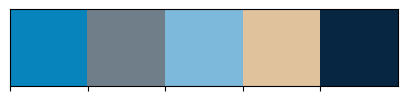

In [16]:
sns.palplot(['#0784BC','#6F7E88','#7DB9DB','#E0C29D','#062641'])

In [17]:
palette = ['#0784BC','#6F7E88','#7DB9DB','#E0C29D','#062641']

## 1. Сколько новых пользователей подписывается на сервис каждый месяц?

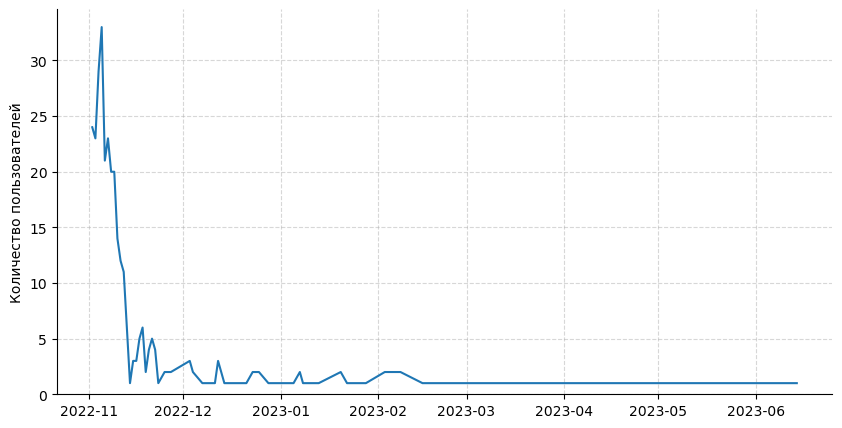

In [18]:
fig, ax = plt.subplots(figsize=(10,5))

user_counts = data['first_sub_date'].value_counts().sort_index()

user_counts = user_counts[user_counts.index > '2022-11-01']

sns.lineplot(x = user_counts.index, y = user_counts.values, ax = ax)

sns.despine()

ax.grid(axis = 'x', linestyle = '--', alpha = 0.5)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.5)

ax.set_ylim(0)

ax.set_ylabel('Количество пользователей')

plt.show()

С ноября-декабря 2022-го года началось падение новых подписчиков сервиса, и сейчас стабильно в районе 1-2 пользователей в день.

## 2. Какой самый популярный тип подписки у пользователей?

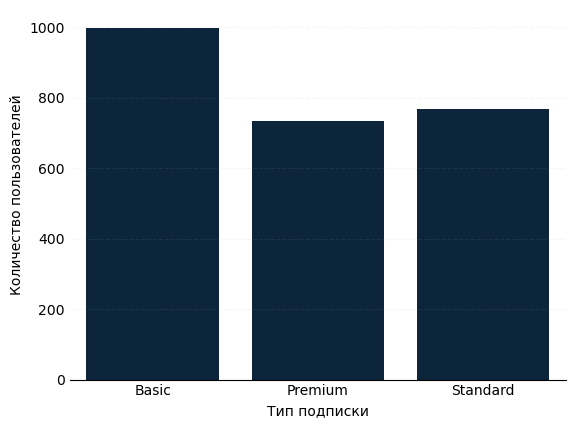

In [19]:
fig, ax = plt.subplots()

sns.countplot(x = 'sub_type', data = data, color = '#062641')

sns.despine()

ax.grid(axis = 'y', linestyle = '--', alpha = 0.1)

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.tick_params(axis = 'both', which = 'both', length = 0)

ax.set_ylabel('Количество пользователей')
ax.set_xlabel('Тип подписки')

plt.show()

Самой популярный тип подписки среди пользователей - Базовая (Basic). При этом премиальный (Premium) и стандартный (Standard) сегменты находятся в одном диапазоне значений. Премиальный (Premium) имеет меньше всех остальных пользователей.

## 3. Сколько пользователей в различных странах?

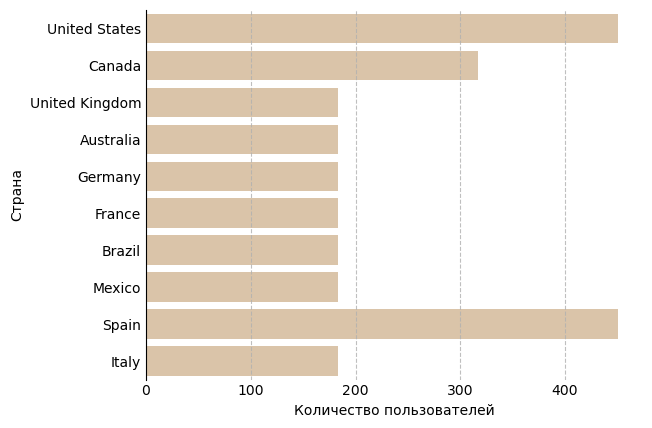

In [55]:
fig, ax = plt.subplots()

sns.countplot(y = 'country', data = data, color = '#E0C29D', alpha = 0.95)

sns.despine()

ax.grid(axis = 'x', linestyle = '--', alpha = 0.8)

for s in ['top', 'bottom', 'right']:
    ax.spines[s].set_visible(False)
    
ax.tick_params(axis = 'both', which = 'both', length = 0)

ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Страна')

plt.savefig('Country.jpg')

#самостоятельное задание - нужно сделать такой же график, как в прошлом вопросе
#но!
#поменять цвет графика и расположить столбцы по оси y (то есть названия стран)
#а количетсво пользователей по оси x

plt.show()

В США. Канаде и Испании наибольшее количество пользователей сервиса. При этом в остальных странах количество пользователей одинаковое. Стоит обратить на них внимание как на потенциальные рынки для роста.

## 4. Какое распределение по возрасту среди пользователей сервиса?

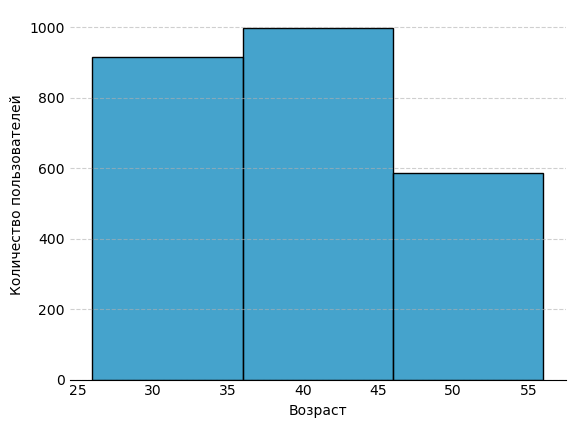

In [21]:
fig, ax = plt.subplots()

sns.histplot(x = 'age', data = data, color = '#0784BC', binwidth = 10)

sns.despine()

ax.grid(axis = 'y', linestyle = '--', alpha = 0.6)

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.tick_params(axis = 'both', which = 'both', length = 0)

ax.set_ylabel('Количество пользователей')
ax.set_xlabel('Возраст')

plt.show()

Преобладающая группа пользователей - от 25 до 45 лет.

## 5. В каких странах находятся пользователи, которые дольше всего подписаны на сервис?

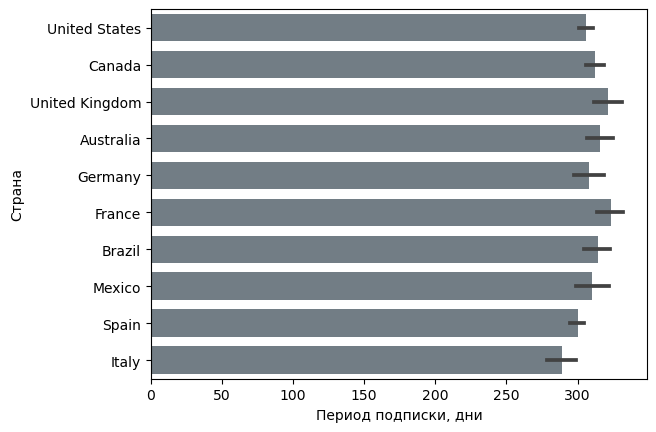

In [25]:
fig, ax = plt.subplots()

sns.barplot(x = 'sub_period', y = 'country', data = data, color = '#6F7E88', width = 0.75)

ax.set_xlabel('Период подписки, дни')
ax.set_ylabel('Страна')

plt.show()

Дольше всего подписаны на сервис пользователи из Великобритании и Франции. Вторыми по данному показателю являются Австралия и Бразилия.

## 6. Как связаны типы подписок и страна пользователя?

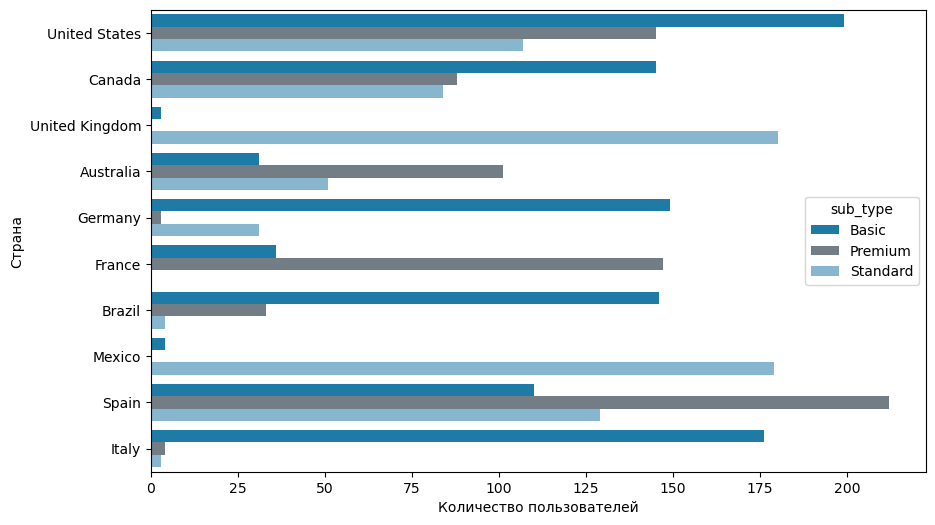

In [31]:
fig, ax = plt.subplots(figsize=(10,6))

#самостоятельное задание

sns.countplot(y= 'country', hue= 'sub_type', data=data, palette=palette, width=0.8)

ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Страна')

plt.show()

Базовая подписка популярна у пользователей из США, Канады, Германии, Бразилии и Италии. Премиальная подписка пользуется популярностью у зрителей из Испании. Стандартная подписка - выбор жителей Мексики и Великобритании.
Меньше всего на базовую подписку соглашались зрители из Великобритании и Мексики. Пользователи из Германии, Мексики и Италии не жалуют премиальный тариф. У стандартного тарифа мало пользователей в Италии и Бразилии.

## 7. Какая платформа для использования сервиса самая популярная?

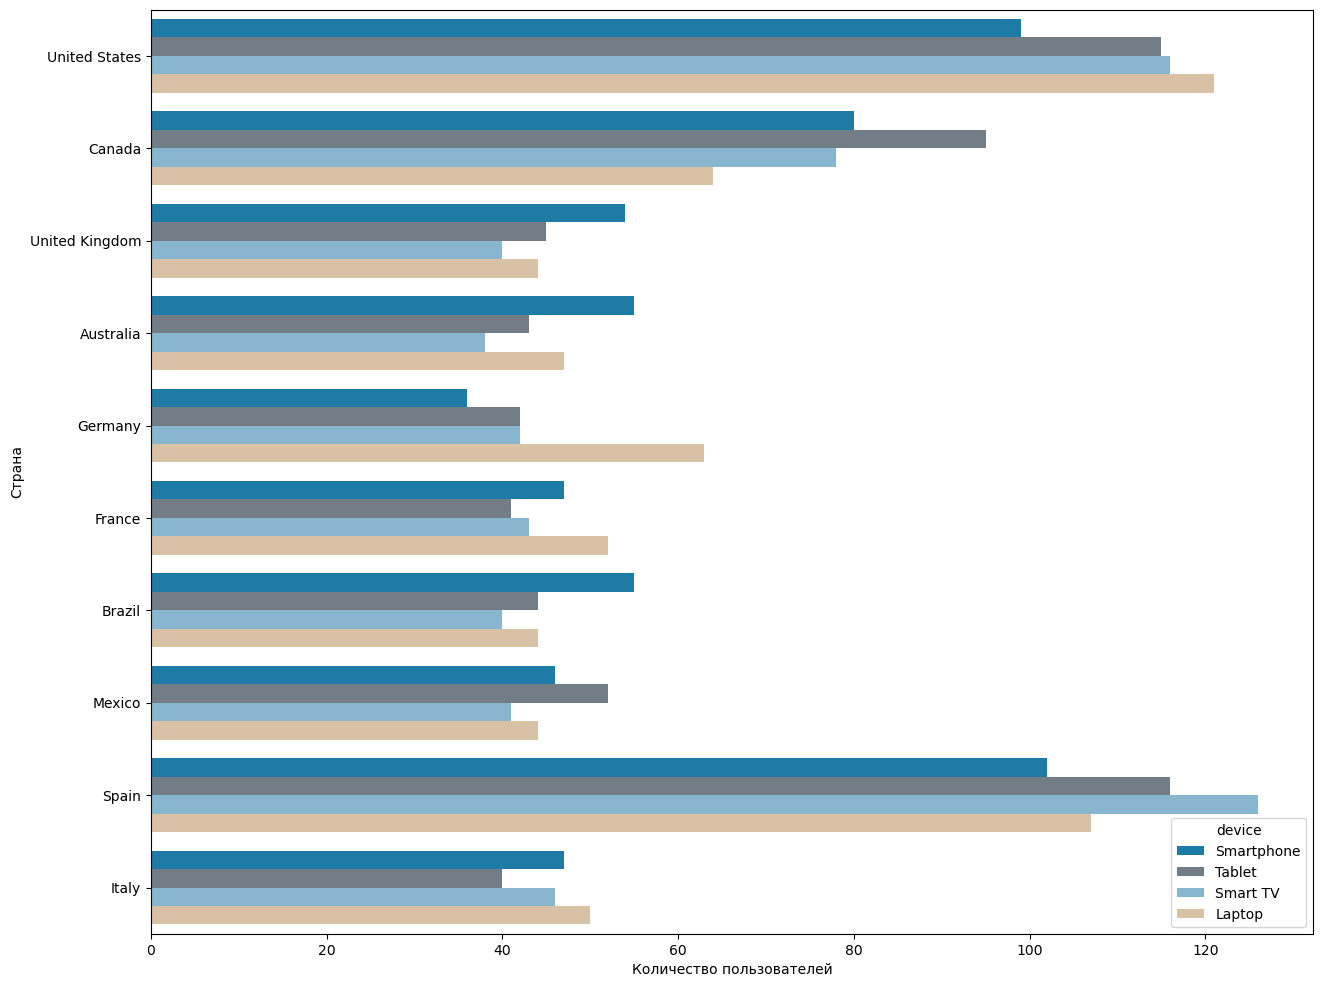

In [59]:
fig, ax = plt.subplots(figsize=(15,12))

sns.countplot(y= 'country', hue= 'device', data=data, palette=palette, width=0.8)

ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Страна')

plt.show()

При рассмотрении отдельных стран получаем следующее:
1. В США и Германии самой популярной плтформой ялвяется ПК;
2. На смартфоне сервисом чаще пользуются в Бразилии, Австралии и Великобритании;
3. Канада - единственная страна, где популярны планшеты.

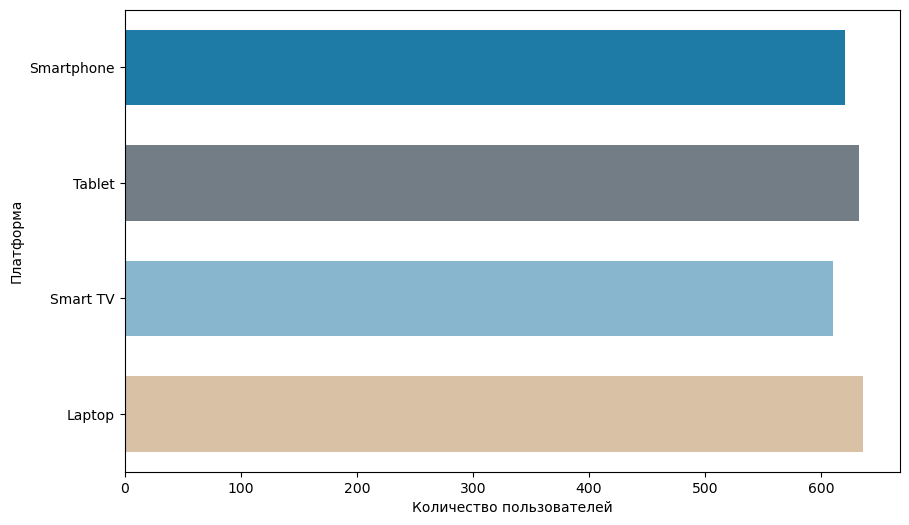

In [51]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(y = 'device', data = data, palette = palette, width = 0.65)

ax.set_xlabel('Количество пользователей')
ax.set_ylabel('Платформа')

plt.show()

Наиболее популярными платформами являются ПК и планшет. Наименее - Смарт ТВ.

## 8. Как связана выручка и тип подписки, страна и платформа?

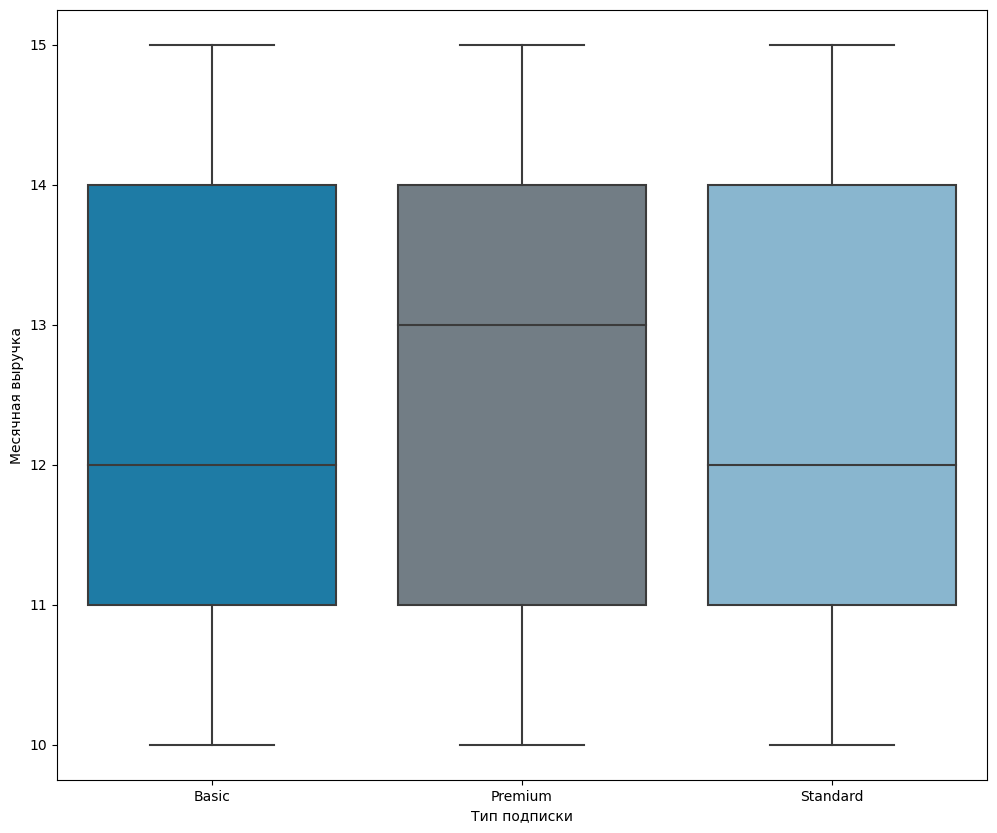

In [43]:
fig, ax = plt.subplots(figsize=(12,10))

sns.boxplot(x = 'sub_type', y = 'monthly_revenue', data = data, palette = palette)

ax.set_xlabel('Тип подписки')
ax.set_ylabel('Месячная выручка')

plt.show()

Премиальная подписка в среднем приносит больше месячной выручки, нежели базовая и стандартная.

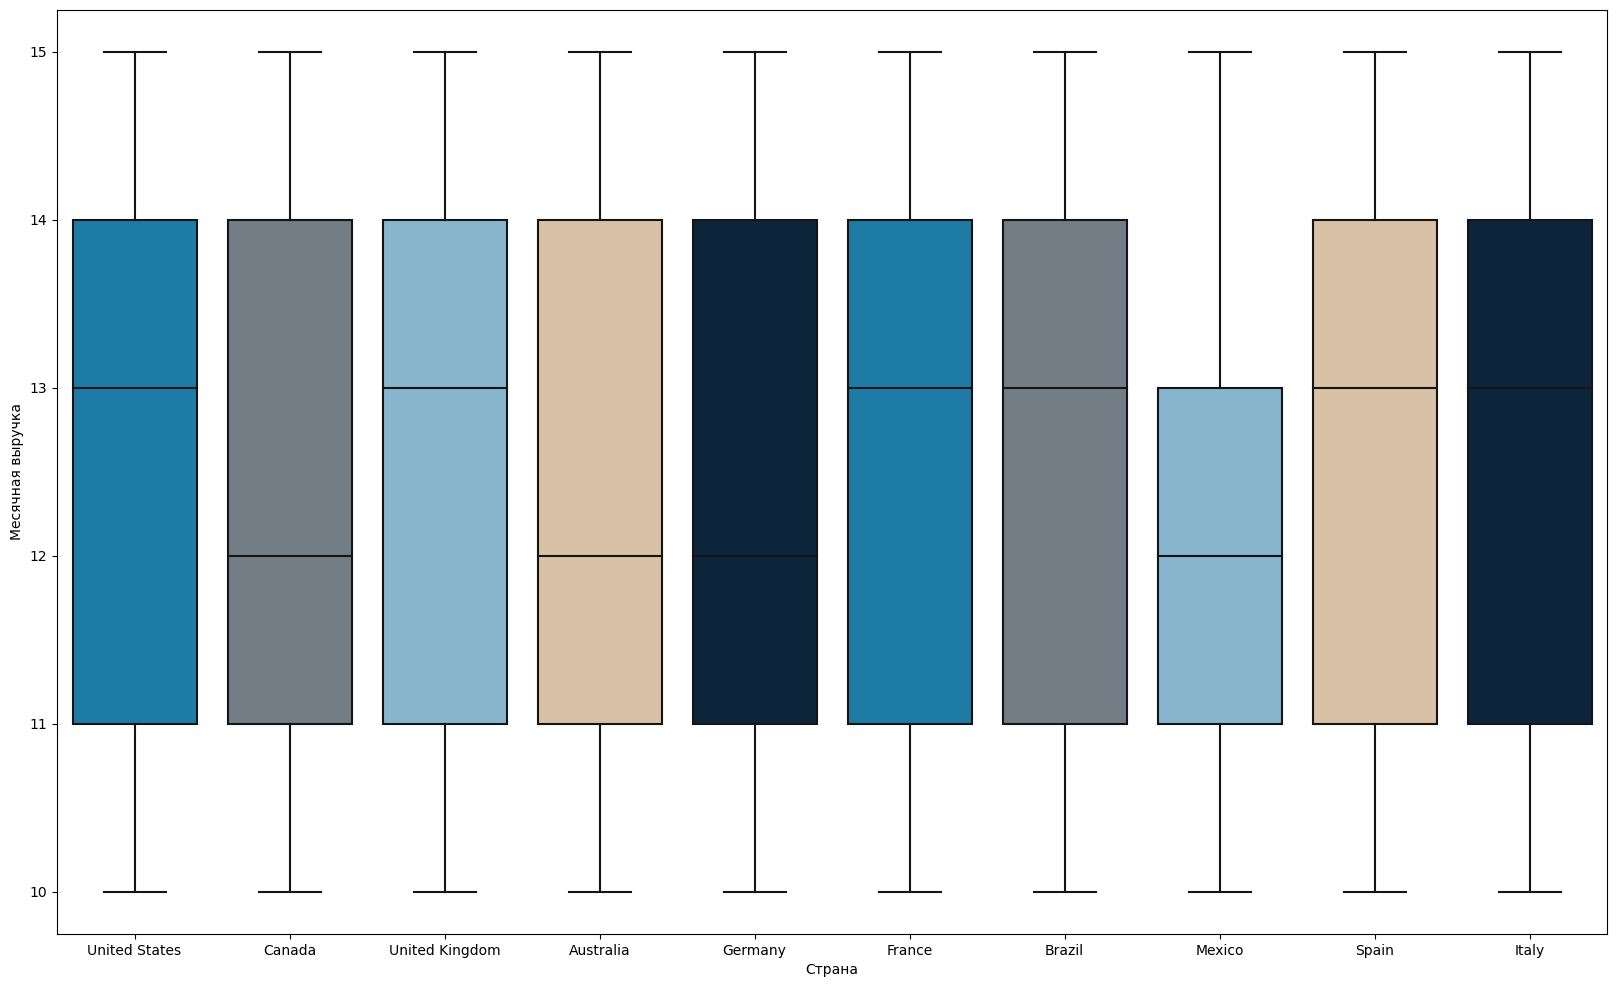

In [44]:
fig, ax = plt.subplots(figsize=(20,12))

sns.boxplot(x = 'country', y = 'monthly_revenue', data = data, palette = palette)

ax.set_xlabel('Страна')
ax.set_ylabel('Месячная выручка')

plt.show()

Мексика - единственная страна, где общая месячная выручка меньше, чем в остальных странах. Это объясняется отсутствием пермиальной подписки у пользователей, и их выбором в пользу стандартной.
Большую месячную выручку приносят такие страны, как Великобритания, США, Франция, Бразилия, Испания, Италия. Меньшую общую выручку дают Канада, Австралия и Германия.

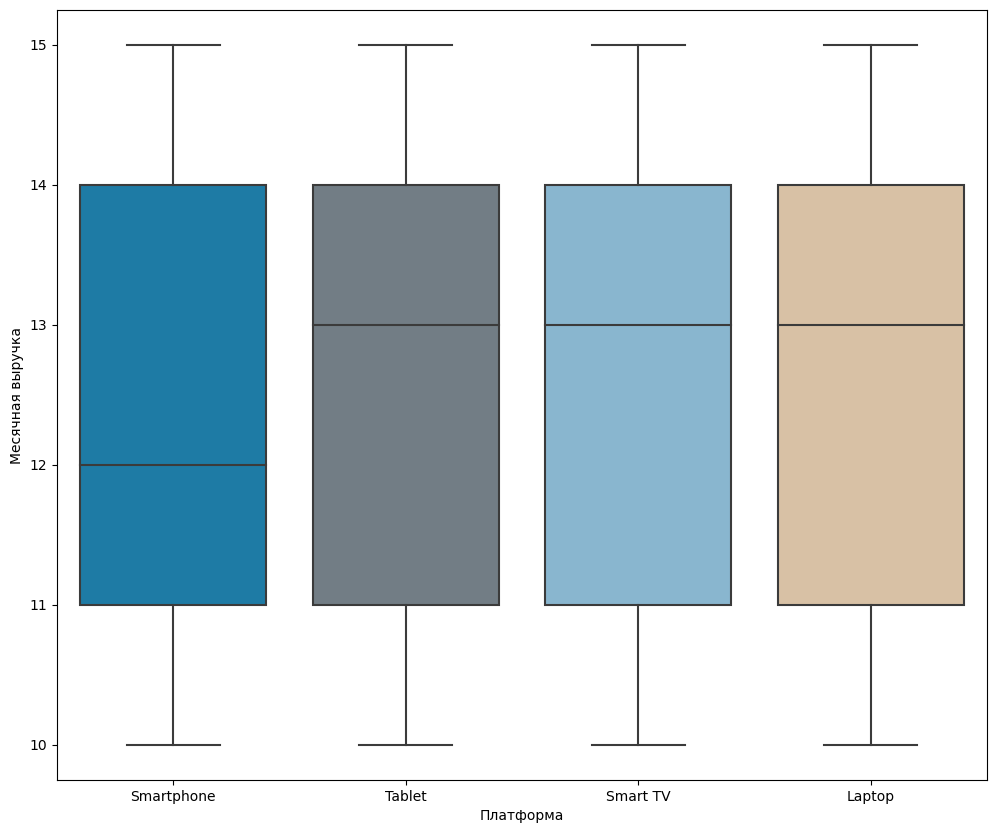

In [45]:
fig, ax = plt.subplots(figsize=(12,10))

sns.boxplot(x = 'device', y = 'monthly_revenue', data = data, palette = palette)

ax.set_xlabel('Платформа')
ax.set_ylabel('Месячная выручка')
plt.show()

Подписка, оформляемая пользователями на самртфонах, приносит меньшую выручку каждый месяц, чем все остальные платформы. 

## 9. Сколько пользователей от нас ушли за все время?

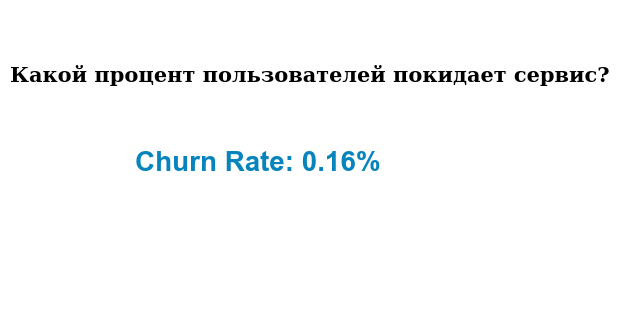

In [53]:
churn_rate = (data['sub_period'] < 30).mean()

# Создание фигуры и оси
fig, ax = plt.subplots(figsize=(6, 4))

# Вывод числа с помощью функции text
ax.text(0.5, 0.5, f'Churn Rate: {churn_rate * 100}%', fontsize=20, ha='center', va='center', color='#0784BC', weight='bold')

fig.text(0.10,0.7,'Какой процент пользователей покидает сервис?', fontfamily='serif',fontsize=15, fontweight='bold')
# Убираем оси для красивого отображения
ax.axis('off')

plt.show()

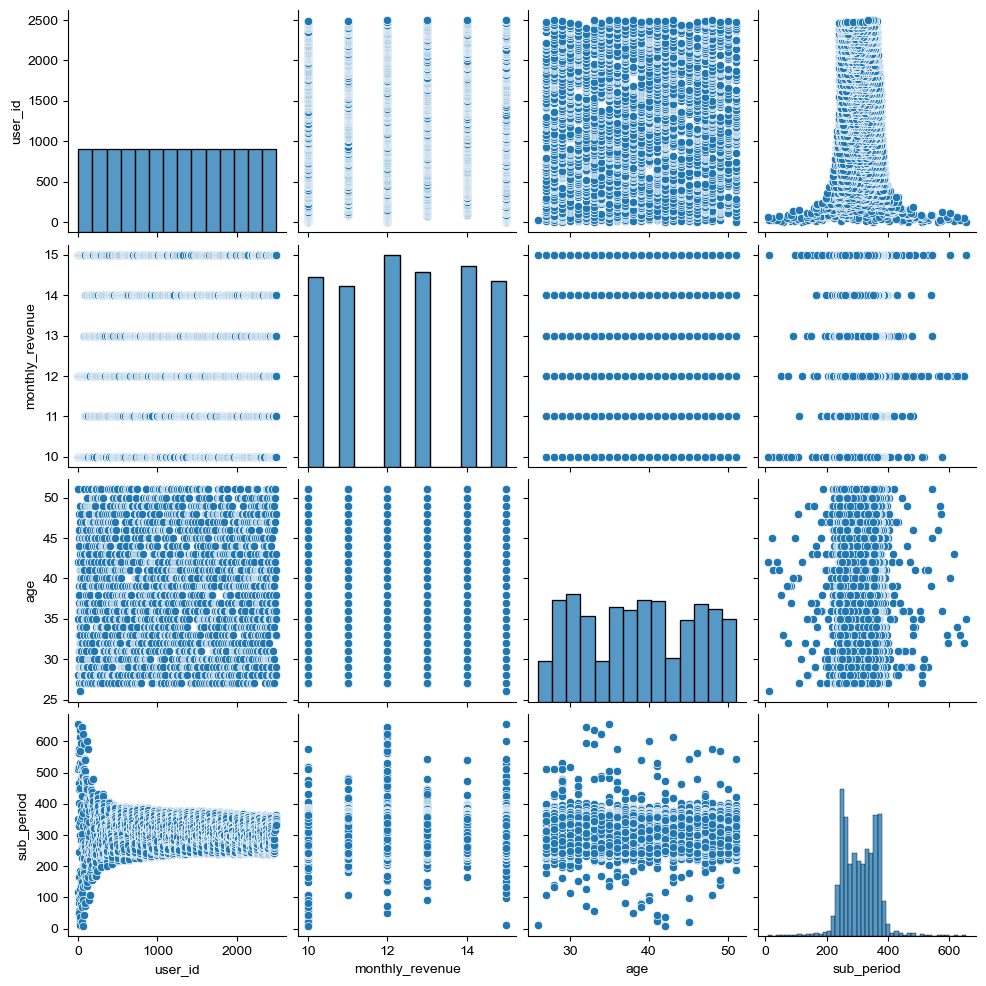

In [54]:
sns.pairplot(data)
plt.show()

## Бонус-график

In [29]:
import plotly.express as px

country_data = data.groupby('country').agg({'user_id': 'count', 'monthly_revenue': 'sum'}).reset_index()

fig1 = px.choropleth(country_data, locations='country', locationmode='country names',
                     color='user_id', title='Количество пользователей по странам',
                     hover_name='country', color_continuous_scale='Plasma')
fig1.show()

fig2 = px.choropleth(country_data, locations='country', locationmode='country names',
                     color='monthly_revenue', title='Выручка по странам',
                     hover_name='country', color_continuous_scale='Plasma')
fig2.show()

In [ ]:
#нам позже пригодится!

fig.text(0, 0.9, 
         'Количество пользователей по типу подписки', 
         fontsize=16, 
         fontweight='bold', 
         fontfamily='serif',
        )


fig.text(0, 0.95, 
         'Количество пользователей по странам в разрезе типов подписки', 
         fontsize=14, 
         fontweight='bold', 
         fontfamily='serif',
        )
fig.text(0, 0.9, 
         'В Мексике и Великобритании пользователи не приобретают Премиум подписки', 
         fontsize=12, 
         fontweight='light', 
         fontfamily='serif',
        )